In [1]:
# Dependencies
import os 
import csv
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Module for reading CSV files
path = os.path.join('Resources', 'average_auto_finance.csv')
path

'Resources\\average_auto_finance.csv'

In [3]:
with open(path) as csvfile:
    average_financed = csv.reader(csvfile)  
    print(average_financed)

    # Read the header row first 
    csv_header = next(average_financed)
    print(f"CSV Header: {csv_header}")

    # Read each row of data after the header
    for row in average_financed:
        print(row)

CSV Header: ['observation_date', 'DTCTLVENANM']
['2008-03-01', '25041.08']
['2008-04-01', '']
['2008-05-01', '']
['2008-06-01', '23623.28']
['2008-07-01', '']
['2008-08-01', '']
['2008-09-01', '24759.34']
['2008-10-01', '']
['2008-11-01', '']
['2008-12-01', '24843.26']
['2009-01-01', '']
['2009-02-01', '']
['2009-03-01', '25088.65']
['2009-04-01', '']
['2009-05-01', '']
['2009-06-01', '25657.32']
['2009-07-01', '']
['2009-08-01', '']
['2009-09-01', '24009.70']
['2009-10-01', '']
['2009-11-01', '']
['2009-12-01', '26547.94']
['2010-01-01', '']
['2010-02-01', '']
['2010-03-01', '25962.78']
['2010-04-01', '']
['2010-05-01', '']
['2010-06-01', '25463.91']
['2010-07-01', '']
['2010-08-01', '']
['2010-09-01', '25219.03']
['2010-10-01', '']
['2010-11-01', '']
['2010-12-01', '25261.78']
['2011-01-01', '']
['2011-02-01', '']
['2011-03-01', '25082.26']
['2011-04-01', '']
['2011-05-01', '']
['2011-06-01', '24718.03']
['2011-07-01', '']
['2011-08-01', '']
['2011-09-01', '25191.12']
['2011-10-01', 

In [4]:
#creating a df
average_financed_df = pd.read_csv(path)
average_financed_df.head()

,observation_date,DTCTLVENANM
0,2008-03-01,25041.08
1,2008-04-01,NaN
2,2008-05-01,NaN
3,2008-06-01,23623.28
4,2008-07-01,NaN


In [5]:
#Drop and NaNs
cleaned_average_financed_df = average_financed_df.dropna(how='any')
cleaned_average_financed_df.head()

,observation_date,DTCTLVENANM
0,2008-03-01,25041.08
3,2008-06-01,23623.28
6,2008-09-01,24759.34
9,2008-12-01,24843.26
12,2009-03-01,25088.65


In [6]:
#Edit the column names to make them easier to read when I concatinate all the DataFrames together
cleaned_average_financed_df = cleaned_average_financed_df.rename(columns={"observation_date": "Date Dispersed", "DTCTLVENANM": "Amount Financed"})
cleaned_average_financed_df.head()

,Date Dispersed,Amount Financed
0,2008-03-01,25041.08
3,2008-06-01,23623.28
6,2008-09-01,24759.34
9,2008-12-01,24843.26
12,2009-03-01,25088.65


In [7]:
#Reset the Index
cleaned_average_financed_df = cleaned_average_financed_df.reset_index(drop=True)
cleaned_average_financed_df.head()

,Date Dispersed,Amount Financed
0,2008-03-01,25041.08
1,2008-06-01,23623.28
2,2008-09-01,24759.34
3,2008-12-01,24843.26
4,2009-03-01,25088.65


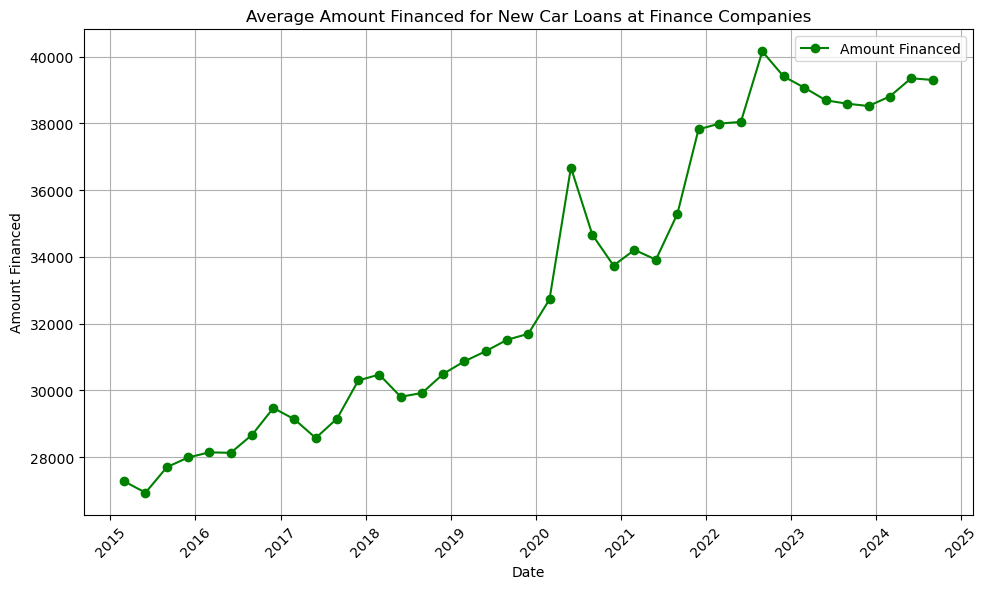

In [10]:
# Convert the 'Date Dispersed' column to datetime if it's not already
cleaned_average_financed_df['Date Dispersed'] = pd.to_datetime(cleaned_average_financed_df['Date Dispersed'])

# Filter the data to include only dates within the range
start_date = '2015-01-01'
end_date = '2025-01-01'

filtered_df = cleaned_average_financed_df[(cleaned_average_financed_df['Date Dispersed'] >= start_date) & 
                                           (cleaned_average_financed_df['Date Dispersed'] <= end_date)]

# Plotting the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date Dispersed'], filtered_df['Amount Financed'], label='Amount Financed', marker='o', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Amount Financed')
plt.title('Average Amount Financed for New Car Loans at Finance Companies')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.legend()
plt.savefig('average_financed.png')
plt.show()
